In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

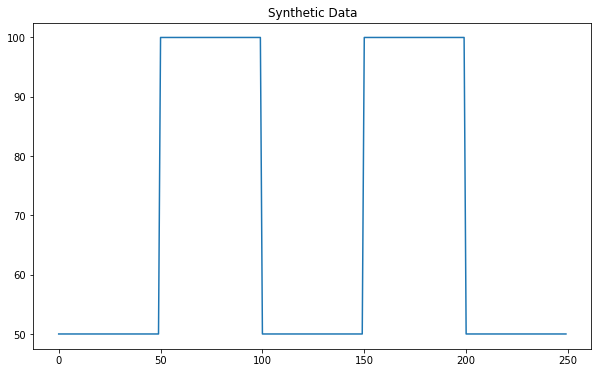

In [2]:
x = np.arange(0, 250)
y = np.empty([250], dtype = int)
y[0:50] = 50
y[50:100] = 100
y[100:150] = 50
y[150:200] = 100
y[200:250] = 50
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [3]:
pd.DataFrame(sd).describe()

,0
count,250.000000
mean,70.000000
std,24.544035
min,50.000000
25%,50.000000
50%,50.000000
75%,100.000000
max,100.000000


In [4]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,50
1,1,50
2,2,50
3,3,50
4,4,50
...,...,...
245,245,50
246,246,50
247,247,50
248,248,50


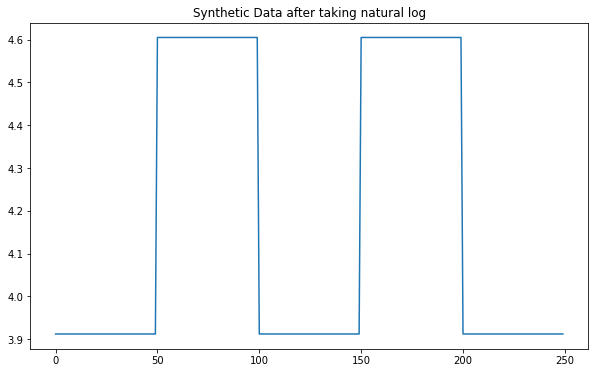

In [5]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [6]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,3.912023
1,1,3.912023
2,2,3.912023
3,3,3.912023
4,4,3.912023
...,...,...
245,245,3.912023
246,246,3.912023
247,247,3.912023
248,248,3.912023


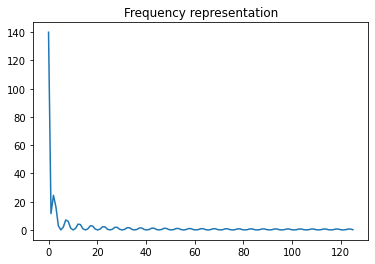

In [7]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

In [8]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,140.000000
1,0.004,11.563588
2,0.008,24.494006
3,0.012,16.331486
4,0.016,2.892039
...,...,...
120,0.480,0.000000
121,0.484,0.145492
122,0.488,0.615974
123,0.492,0.615731


In [9]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
yf1 = yf[yf != 0]
yf1

array([ 1.75000000e+04-0.00000000e+00j, -1.44533435e+03-1.81635632e+01j,
       -3.06078381e+03-7.69420884e+01j,  2.03998531e+03+7.69420884e+01j,
        3.61048224e+02+1.81635632e+01j, -2.40445066e+02-1.81635632e+01j,
       -8.72436612e+02-7.69420884e+01j,  7.62777014e+02+7.69420884e+01j,
        1.59915824e+02+1.81635632e+01j, -9.18279335e-14+1.95144292e-13j,
       -1.30562964e+02-1.81635632e+01j, -5.06364664e+02-7.69420884e+01j,
        4.66791690e+02+7.69420884e+01j,  1.02176231e+02+1.81635632e+01j,
        1.80799191e-14+1.43117297e-13j, -8.91175249e+01-1.81635632e+01j,
       -3.54672305e+02-7.69420884e+01j,  3.34337532e+02+7.69420884e+01j,
        7.46231257e+01+1.81635632e+01j, -6.72238504e+01-1.81635632e+01j,
       -2.71184808e+02-7.69420884e+01j,  2.58756786e+02+7.69420884e+01j,
        5.83882647e+01+1.81635632e+01j, -8.22645686e-13+2.67293786e-13j,
       -5.36003192e+01-1.81635632e+01j, -2.18003006e+02-7.69420884e+01j,
        2.09573848e+02+7.69420884e+01j,  4.76155364

In [10]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [11]:
quefrency[1:]

array([ 0.21834061,  0.43668122,  0.65502183,  0.87336245,  1.09170306,
        1.31004367,  1.52838428,  1.74672489,  1.9650655 ,  2.18340611,
        2.40174672,  2.62008734,  2.83842795,  3.05676856,  3.27510917,
        3.49344978,  3.71179039,  3.930131  ,  4.14847162,  4.36681223,
        4.58515284,  4.80349345,  5.02183406,  5.24017467,  5.45851528,
        5.6768559 ,  5.89519651,  6.11353712,  6.33187773,  6.55021834,
        6.76855895,  6.98689956,  7.20524017,  7.42358079,  7.6419214 ,
        7.86026201,  8.07860262,  8.29694323,  8.51528384,  8.73362445,
        8.95196507,  9.17030568,  9.38864629,  9.6069869 ,  9.82532751,
       10.04366812, 10.26200873, 10.48034934, 10.69868996, 10.91703057,
       11.13537118, 11.35371179, 11.5720524 , 11.79039301, 12.00873362,
       12.22707424, 12.44541485, 12.66375546, 12.88209607, 13.10043668,
       13.31877729, 13.5371179 , 13.75545852, 13.97379913, 14.19213974,
       14.41048035, 14.62882096, 14.84716157, 15.06550218, 15.28

In [12]:
cepstrum[1:]

array([ 119.39821563+0.j,  118.82636125+0.j,   42.8819566 +0.j,
         89.26134458+0.j,   27.70684969+0.j,   79.44259557+0.j,
         21.82626595+0.j,   73.96095472+0.j,   23.81232953+0.j,
        289.38281319+0.j,    2.35645062+0.j,   81.63023072+0.j,
          4.62447628+0.j,   79.4591324 +0.j,    1.58379504+0.j,
         81.96997227+0.j,   -5.3412996 +0.j,   93.64033913+0.j,
        -37.474084  +0.j, -390.01810792+0.j,   40.57446571+0.j,
         55.11360968+0.j,   13.16749963+0.j,   66.93221857+0.j,
          2.60772005+0.j,   77.2187325 +0.j,  -11.88456922+0.j,
        102.54438035+0.j,  -79.99109916+0.j, -574.56426067+0.j,
         86.38443821+0.j,   20.47788485+0.j,   38.98237864+0.j,
         38.01336849+0.j,   29.47997178+0.j,   42.08959516+0.j,
         29.85250881+0.j,   34.29179769+0.j,   68.4171169 +0.j,
        371.76232903+0.j,  -46.88985514+0.j,  101.14708785+0.j,
        -27.9443505 +0.j,   99.68081977+0.j,  -36.24075391+0.j,
        116.45488923+0.j,  -67.02922921+

In [13]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep

,Quefrency,Cepstrum
0,0.000000,30.262503
1,0.218341,119.398216
2,0.436681,118.826361
3,0.655022,42.881957
4,0.873362,89.261345
...,...,...
110,24.017467,-34.102841
111,24.235808,59.589676
112,24.454148,20.457048
113,24.672489,41.421243


In [14]:
# GMM on normal time series data
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [15]:
# GMM on natural log values of time series data 
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [16]:
# GMM on fft data
dfx = freq_ampli.iloc[1:,:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [17]:
# GMM on cepstrum data 
# GMM doesn't work in this case
dfx = cep.iloc[1:,:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

Results of GMM on normal time series data

In [18]:
seasonal_data.describe()

,Time,Value
count,250.000000,250.000000
mean,124.500000,70.000000
std,72.312977,24.544035
min,0.000000,50.000000
25%,62.250000,50.000000
50%,124.500000,50.000000
75%,186.750000,100.000000
max,249.000000,100.000000


In [19]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [20]:
best_gmm0.weights_

array([0.6, 0.4])

In [21]:
best_gmm0.means_

array([[ 50.],
       [100.]])

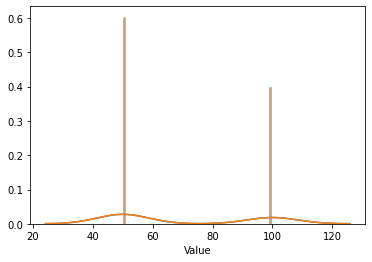

In [22]:
#Time Series
sns.distplot(seasonal_data['Value'],bins=50)
z,_ = best_gmm0.sample(250)
sns.distplot(z,bins=50)

In [23]:
#Time Series
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
print(best_gmm0.score(z))

5.315805078768208
4.846602187535032


Results of GMM on natural log values of time series data

In [24]:
nlog_data.describe()

,Time,Log Value
count,250.000000,250.000000
mean,124.500000,4.189282
std,72.312977,0.340253
min,0.000000,3.912023
25%,62.250000,3.912023
50%,124.500000,3.912023
75%,186.750000,4.605170
max,249.000000,4.605170


In [25]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
best_gmm1.weights_

array([0.6, 0.4])

In [27]:
best_gmm1.means_

array([[3.91202301],
       [4.60517019]])

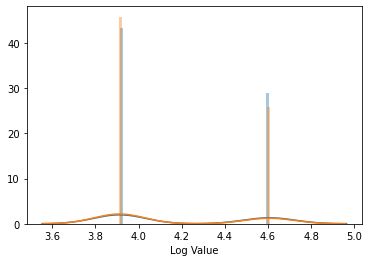

In [28]:
#Time Series - Log
sns.distplot(nlog_data['Log Value'],bins=50)
z,_ = best_gmm1.sample(250)
sns.distplot(z,bins=50)

In [29]:
#Time Series - Log
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
print(best_gmm1.score(z))

5.3158050805871975
4.8728504399826384


Results of GMM on fft data

In [30]:
freq_ampli.describe()

,Freq,Ampli
count,125.000000,125.000000
mean,0.248000,2.227648
std,0.144914,12.756939
min,0.000000,0.000000
25%,0.124000,0.149551
50%,0.248000,0.407698
75%,0.372000,0.865082
max,0.496000,140.000000


In [31]:
best_gmm2

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [32]:
best_gmm2.weights_

array([0.74986752, 0.00806452, 0.00806452, 0.05271339, 0.17322554,
       0.00806452])

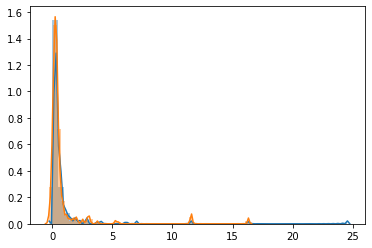

In [42]:
#Frequency
freq1 = freq_ampli.iloc[1:,:]
y,_ = best_gmm2.sample(124)
sns.distplot(freq1)
sns.distplot(y)

In [43]:
#Freq
print(best_gmm2.score(freq1))
print(best_gmm2.score(y))

0.11487482930285443
0.2771159366156449


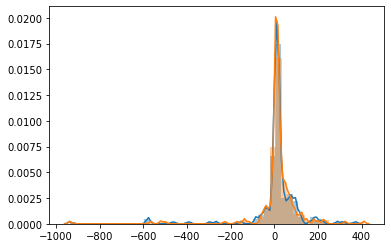

In [38]:
cep1 = cep.iloc[1:,:]
a,_ = best_gmm3.sample(115)
sns.distplot(cep1)
sns.distplot(a)

In [39]:
print(best_gmm2.score(cep1))
print(best_gmm2.score(a))

-41046.37905465976
-35479.923280684416


In [40]:
best_gmm3

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)